# Hybrid Time Series Forecasting of Chilean CPI (IPC)

## Overview
This notebook consolidates the full ARMA-based forecasting pipeline for Chile's CPI (IPC),
combining decomposition, deterministic modeling, residual diagnostics, and ARMA forecasting.

It is intended as a **portfolio-ready, end-to-end project**, derived from multiple exploratory notebooks.


In [ ]:
!pip install darts

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from darts import TimeSeries
from darts.utils.statistics import plot_acf, plot_pacf
import matplotlib.pyplot as plt


In [ ]:
msft_data = yf.download('MSFT', start='2014-01-01', end='2023-10-01', interval = '1mo', progress=False)
msft_data = msft_data['Close']  # Nos enfocamos en los precios de cierre


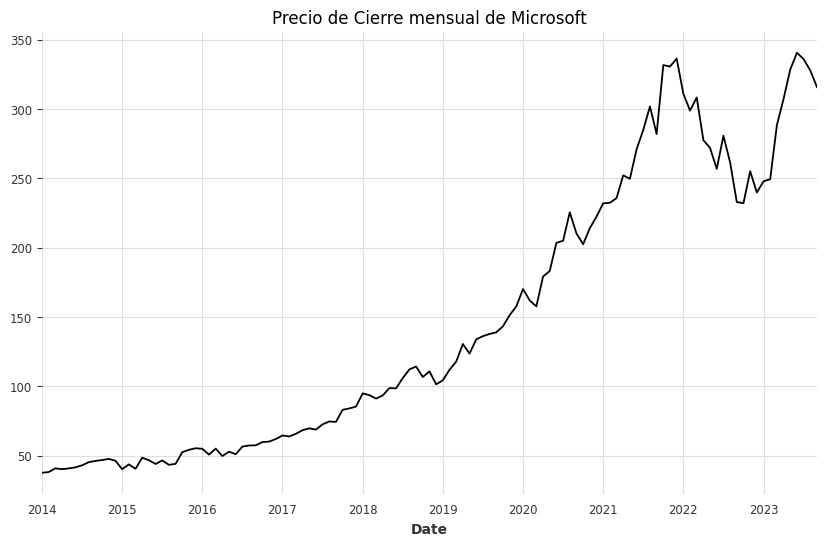

In [ ]:
msft_data.plot(figsize=(10, 6))
plt.title('Precio de Cierre mensual de Microsoft')
plt.show()


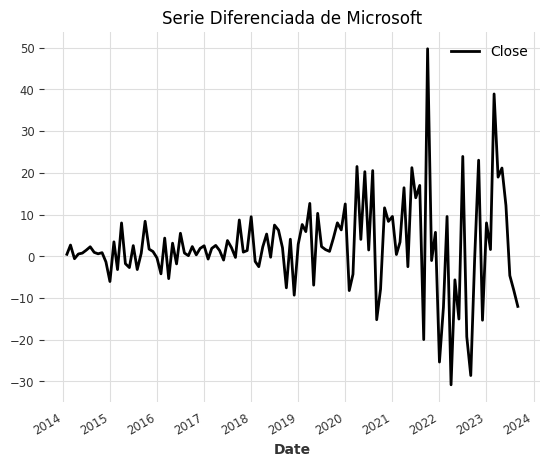

In [ ]:
# Convirtiendo de nuevo a TimeSeries de Darts
msft_ts = TimeSeries.from_series(msft_data, fill_missing_dates=True)

# Diferenciando la serie logarítmica
msft_diff = msft_ts.diff()

msft_diff.plot()
plt.title('Serie Diferenciada de Microsoft')
plt.show()

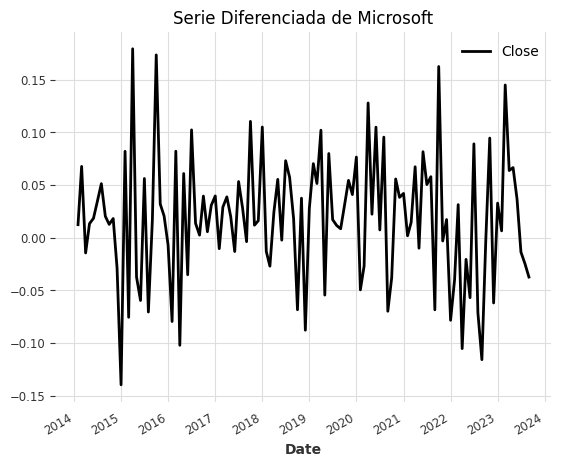

In [ ]:


# Aplicando el logaritmo usando NumPy
msft_log_data = np.log(msft_data)

# Convirtiendo de nuevo a TimeSeries de Darts
msft_log_ts = TimeSeries.from_series(msft_log_data, fill_missing_dates=True)

# Diferenciando la serie logarítmica
msft_diff = msft_log_ts.diff()


msft_diff.plot()
plt.title('Serie Diferenciada de Microsoft')
plt.show()


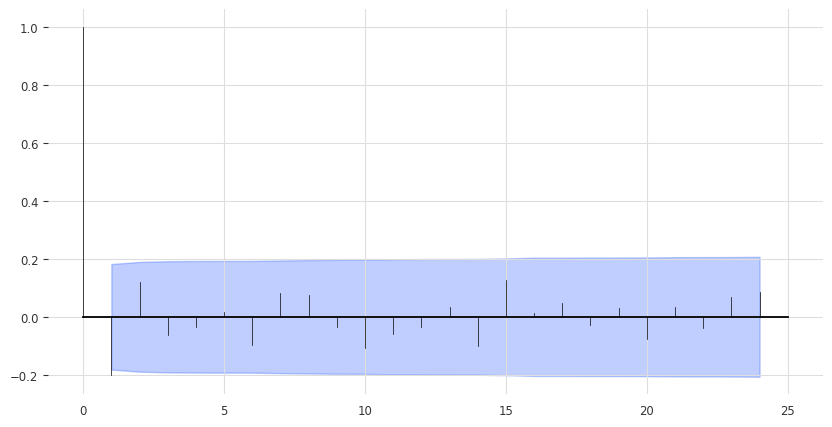

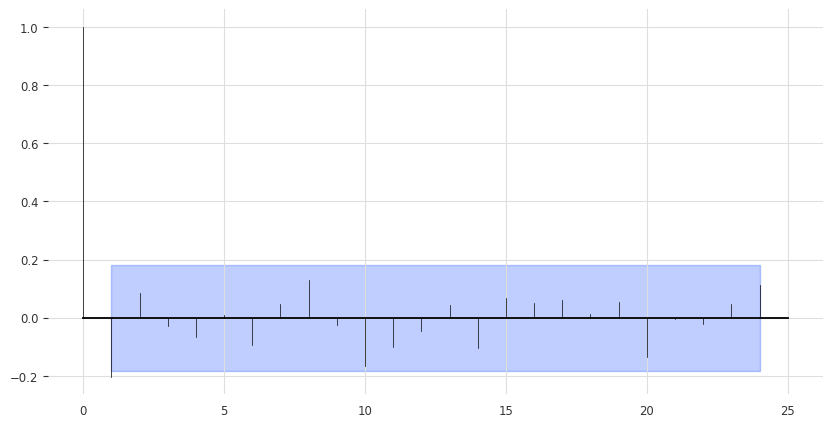

In [ ]:
# Graficar ACF
plot_acf(msft_diff)

# Graficar PACF
plot_pacf(msft_diff)

In [ ]:
!pip install darts

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.utils.statistics import plot_acf, plot_pacf
from darts.models import ARIMA
import matplotlib.pyplot as plt

In [4]:
tesla_data = yf.download('TSLA', start='2014-01-01', end='2023-11-01', interval = '1mo', progress=False)
tesla_data = tesla_data['Close']  # Nos enfocamos en los precios de cierre



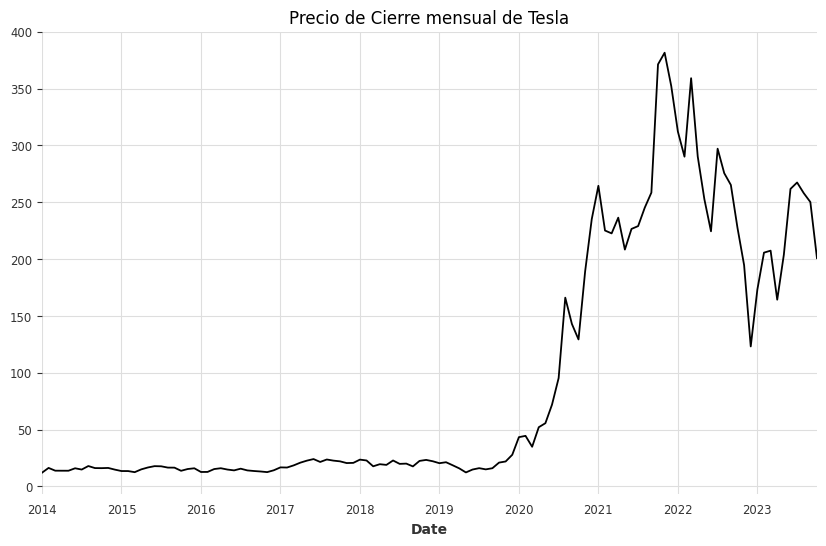

In [5]:
tesla_data.plot(figsize=(10, 6))
plt.title('Precio de Cierre mensual de Tesla')
plt.show()

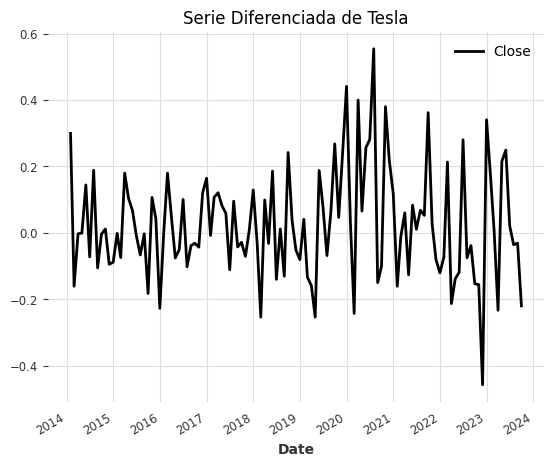

In [6]:
# Aplicando el logaritmo usando NumPy
tesla_log_data = np.log(tesla_data)

# Convirtiendo de nuevo a TimeSeries de Darts
tesla_log_ts = TimeSeries.from_series(tesla_log_data, fill_missing_dates=True)

# Diferenciando la serie logarítmica
tesla_diff = tesla_log_ts.diff()


tesla_diff.plot()
plt.title('Serie Diferenciada de Tesla')
plt.show()

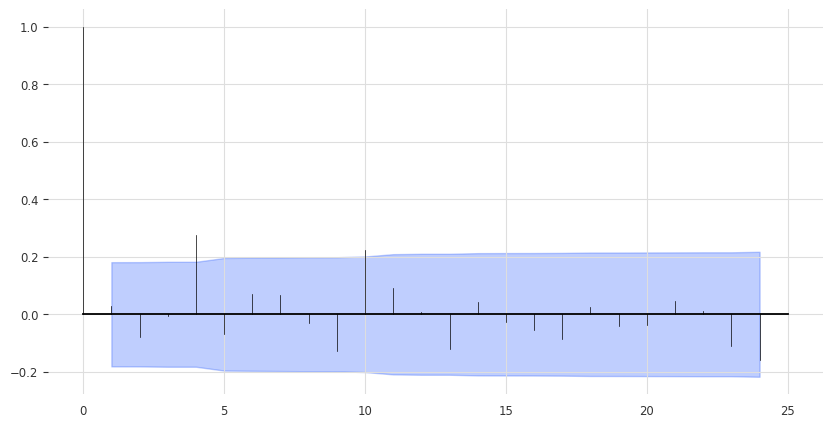

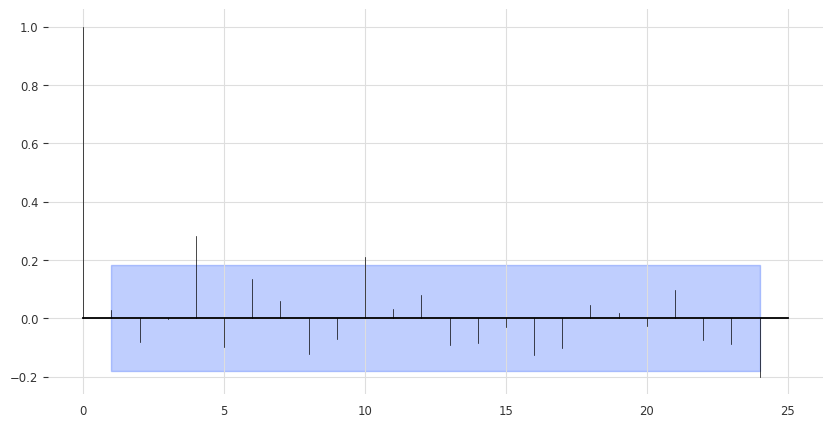

In [7]:
# Graficar ACF
plot_acf(tesla_diff)

# Graficar PACF
plot_pacf(tesla_diff)


In [8]:
import pmdarima as pm

# Convierte la serie temporal de Darts a una serie de pandas
tesla_diff_pd = tesla_diff.pd_series()

# Ajusta el modelo ARIMA utilizando auto_arima
auto_model = pm.auto_arima(tesla_diff_pd, seasonal=False, stepwise=False,
                           suppress_warnings=True,
                           error_action="ignore",
                           max_order=None,
                           trace=True,
                           start_p =0 , max_p = 4,
                           start_q=0 , max_q=4)

# Obtén el AIC del modelo ajustado
aic_value_auto = auto_model.aic()
print(f'AIC auto modelo: {aic_value_auto}')


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-86.433, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-84.742, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-82.982, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-81.038, Time=0.08 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-92.346, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-84.704, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-83.891, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-80.984, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-84.876, Time=0.18 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-90.399, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-83.140, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-81.146, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-82.009, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-90.595, Time=0.26 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-89.425, Time=0.31 sec
 ARIMA(3,0,0)(0,0,0)[0]  

In [9]:
# Obtén los parámetros estimados del modelo seleccionado
estimated_params = auto_model.arima_res_.params
print(f'Parámetros estimados: {estimated_params}')


Parámetros estimados: ma.L1     0.068013
ma.L2    -0.017649
ma.L3    -0.051494
ma.L4     0.355978
sigma2    0.024292
dtype: float64


La ecuación para $X_t$ es:

$$X_t = \epsilon_t + 0.068013 \cdot \epsilon_{t-1} - 0.017649 \cdot \epsilon_{t-2} - 0.051494 \cdot \epsilon_{t-3} + 0.355978 \cdot \epsilon_{t-4}$$
donde $\epsilon_{t} \sim RB(0, 0.024292)$ y $X_t = log(Y_t) - log(Y_{t-1})$ e $Y_t$ es el valor del precio de la acción de Tesla en el mes $t$

In [11]:
tesla_data.tail()

Date
2023-06-01    261.769989
2023-07-01    267.429993
2023-08-01    258.079987
2023-09-01    250.220001
2023-10-01    200.839996
Name: Close, dtype: float64

In [16]:
import numpy as np

# Suponiendo que model es tu modelo ARIMA ajustado
# y que Y_last es el último valor observado de Y_t

# Predice la serie diferenciada X_t para los próximos n periodos
future_diff_preds = auto_model.predict(n_periods=10)

# Integra las predicciones diferenciadas para obtener
# las predicciones del logaritmo de Y_t
log_Y_last = np.log([200.839996])
log_Y_preds = log_Y_last + np.cumsum(future_diff_preds)

# Exponencia las predicciones del logaritmo de Y_t
# para obtener las predicciones de Y_t
Y_preds = np.exp(log_Y_preds)


In [17]:
Y_preds

2023-11-01    196.380330
2023-12-01    197.569032
2024-01-01    196.414996
2024-02-01    177.667408
2024-03-01    177.667408
2024-04-01    177.667408
2024-05-01    177.667408
2024-06-01    177.667408
2024-07-01    177.667408
2024-08-01    177.667408
Freq: MS, dtype: float64

In [ ]:
!pip install darts

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.utils.statistics import plot_acf, plot_pacf
from darts.models import ARIMA
import matplotlib.pyplot as plt

In [3]:
tesla_data = yf.download('TSLA', start='2014-01-01', end='2023-11-01', interval = '1mo', progress=False)
tesla_data = tesla_data['Close']  # Nos enfocamos en los precios de cierre

# Aplicando el logaritmo usando NumPy
tesla_log_data = np.log(tesla_data)

# Convirtiendo de nuevo a TimeSeries de Darts
tesla_log_ts = TimeSeries.from_series(tesla_log_data, fill_missing_dates=True)

# Diferenciando la serie logarítmica
tesla_diff = tesla_log_ts.diff()


In [4]:
import pmdarima as pm

# Convierte la serie temporal de Darts a una serie de pandas
tesla_diff_pd = tesla_diff.pd_series()

# Ajusta el modelo ARIMA utilizando auto_arima
auto_model = pm.auto_arima(tesla_diff_pd, seasonal=False, stepwise=False,
                           suppress_warnings=True,
                           error_action="ignore",
                           max_order=None,
                           trace=True,
                           start_p =0 , max_p = 4,
                           start_q=0 , max_q=4)

# Obtén el AIC del modelo ajustado
aic_value_auto = auto_model.aic()
print(f'AIC auto modelo: {aic_value_auto}')

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-86.433, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-84.742, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-82.982, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-81.038, Time=0.08 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-92.346, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-84.704, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-83.891, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-80.984, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-84.876, Time=0.21 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-90.399, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-83.140, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-81.146, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-82.009, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-90.595, Time=0.79 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-89.425, Time=0.88 sec
 ARIMA(3,0,0)(0,0,0)[0]  

In [5]:
# Obtén los parámetros estimados del modelo seleccionado
estimated_params = auto_model.arima_res_.params
print(f'Parámetros estimados: {estimated_params}')

Parámetros estimados: ma.L1     0.068013
ma.L2    -0.017649
ma.L3    -0.051494
ma.L4     0.355978
sigma2    0.024292
dtype: float64


In [6]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  117
Model:               SARIMAX(0, 0, 4)   Log Likelihood                  51.173
Date:                Thu, 16 Nov 2023   AIC                            -92.346
Time:                        01:00:09   BIC                            -78.535
Sample:                    02-01-2014   HQIC                           -86.739
                         - 10-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0680      0.067      1.012      0.312      -0.064       0.200
ma.L2         -0.0176      0.087     -0.204      0.839      -0.188       0.152
ma.L3         -0.0515      0.087     -0.593      0.553      -0.222       0.119
ma.L4          0.3560      0.086      4.134      0.000       0.187       0.525
sigma2         0.0243      0.003      7.420      0.000       0.018       0.031
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.04
Prob(Q):                              0.96   Prob(JB):                         0.59
Heteroskedasticity (H):               2.33   Skew:                             0.23
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
!pip install darts

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.utils.statistics import plot_acf, plot_pacf
from darts.models import ARIMA
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller

In [3]:
hotel_data = pd.read_csv('hotel_bookings.csv', encoding = 'latin1')

hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/07/15


In [5]:
# Creación de la columna 'date'
hotel_data['arrival_date_month'] = pd.to_datetime(hotel_data['arrival_date_month'], format='%B').dt.month
hotel_data['date'] = pd.to_datetime(hotel_data[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].rename(columns={'arrival_date_year': 'year', 'arrival_date_month': 'month', 'arrival_date_day_of_month': 'day'}))

# Filtrar para Resort Hotel y no canceladas
resort_not_canceled = hotel_data[(hotel_data['hotel'] == 'Resort Hotel') & (hotel_data['is_canceled'] == 0)]

# Crear la columna 'asistentes'
resort_not_canceled['asistentes'] = resort_not_canceled['adults'] + resort_not_canceled['children'].fillna(0)


# Transformar a serie de tiempo
time_series_data = resort_not_canceled.groupby('date')['asistentes'].sum().reset_index()


<ipython-input-5-16092c840e57>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_not_canceled['asistentes'] = resort_not_canceled['adults'] + resort_not_canceled['children'].fillna(0)


Text(0, 0.5, 'Número de Asistentes')

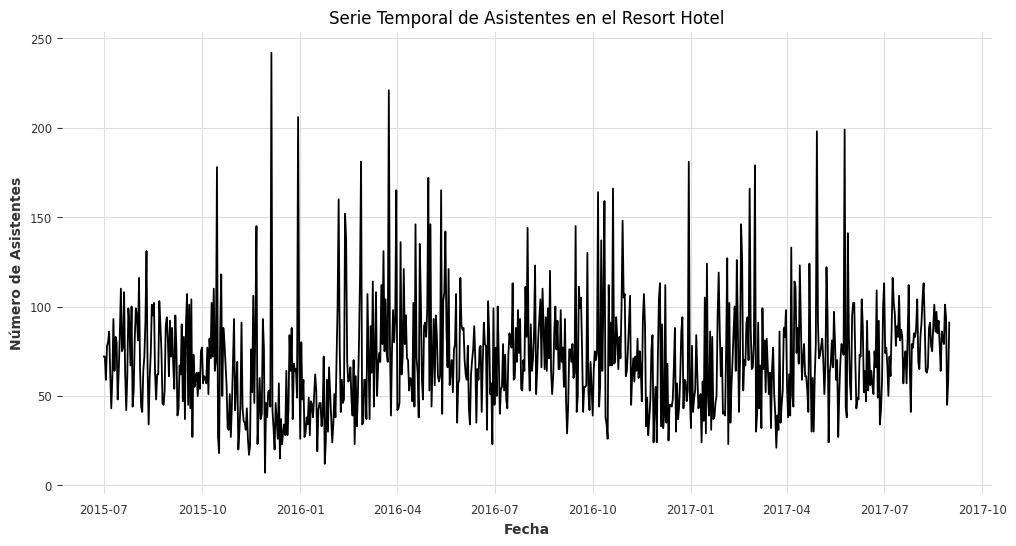

In [6]:
# Graficar la serie temporal de asistentes
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['date'], time_series_data['asistentes'])
plt.title('Serie Temporal de Asistentes en el Resort Hotel')
plt.xlabel('Fecha')
plt.ylabel('Número de Asistentes')

In [7]:
time_series_data['asistentes_log'] = np.log(time_series_data['asistentes'].replace(0, np.nan).dropna())

In [132]:
# Ajusta el modelo ARIMA utilizando auto_arima
auto_model = pm.auto_arima(time_series_data['asistentes_log'],
                           seasonal=True,
                           m = 7,
                           stepwise=False,
                           suppress_warnings=True,
                           error_action="ignore",
                           max_order=None,
                           trace=True)

# Obtén el AIC del modelo ajustado
aic_value_auto = auto_model.aic()

 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1344.888, Time=0.19 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=1293.347, Time=0.78 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=1266.243, Time=0.87 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1271.829, Time=0.54 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=1212.771, Time=5.24 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=1209.082, Time=4.16 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=1247.042, Time=0.72 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=3.43 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=3.58 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=887.194, Time=0.94 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=853.879, Time=1.15 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=838.466, Time=4.83 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=842.614, Time=2.56 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=809.640, Time=2.58 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=812.731, Time=4.81 sec
 ARIMA(0,1,1)(2,0,0)[7] in

In [136]:


# Suponiendo que time_series_data es tu serie temporal
y = time_series_data['asistentes_log']
# Parámetros SARIMA
# Parámetros no estacionales (p, d, q)
p, d, q = 0, 1, 2 # Reemplaza con tus valores

# Parámetros estacionales (P, D, Q, m)
P, D, Q, m = 1, 0, 1, 7  # Reemplaza con tus valores (m es la periodicidad estacional)

# Ajuste del modelo SARIMA
modelo_sarima = sm.tsa.SARIMAX(y,
                               order=(p, d, q),
                              seasonal_order=(P, D, Q, m),
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                                trend='c')

# Ajuste del modelo
resultado_sarima = modelo_sarima.fit()

# Mostrar el resumen del modelo
print(resultado_sarima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                      asistentes_log   No. Observations:                  793
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood                -393.322
Date:                             Thu, 23 Nov 2023   AIC                            798.644
Time:                                     14:47:57   BIC                            826.615
Sample:                                          0   HQIC                           809.401
                                             - 793                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.332e-05      0.000      0.225      0.822      -0.000       0.000
ma.L1         -0.8272      

In [135]:


y = time_series_data['asistentes_log']
# Parámetros SARIMA
# Parámetros no estacionales (p, d, q)
p, d, q = 6, 1, 7 # Reemplaza con tus valores

# Parámetros estacionales (P, D, Q, m)
P, D, Q, m = 0, 0, 0, 0  # Reemplaza con tus valores (m es la periodicidad estacional)

# Ajuste del modelo SARIMA
modelo_sarima = sm.tsa.SARIMAX(y,
                               order=(p, d, q),
                              seasonal_order=(P, D, Q, m),
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                                trend='n')

# Ajuste del modelo
resultado_sarima = modelo_sarima.fit()

# Mostrar el resumen del modelo
print(resultado_sarima.summary())

                               SARIMAX Results                                
Dep. Variable:         asistentes_log   No. Observations:                  793
Model:               SARIMAX(6, 1, 7)   Log Likelihood                -381.896
Date:                Thu, 23 Nov 2023   AIC                            791.793
Time:                        14:47:20   BIC                            857.095
Sample:                             0   HQIC                           816.903
                                - 793                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0300      0.073    -14.171      0.000      -1.172      -0.888
ar.L2         -0.8923      0.095     -9.410      0.000      -1.078      -0.706
ar.L3         -0.9124      0.069    -13.273      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:

asistentes_ts = TimeSeries.from_dataframe(time_series_data.dropna(subset=['asistentes_log']), 'date', 'asistentes_log', fill_missing_dates=True, freq='D')

# Diferenciando la serie logarítmica
asistentes_diff = asistentes_ts.diff()

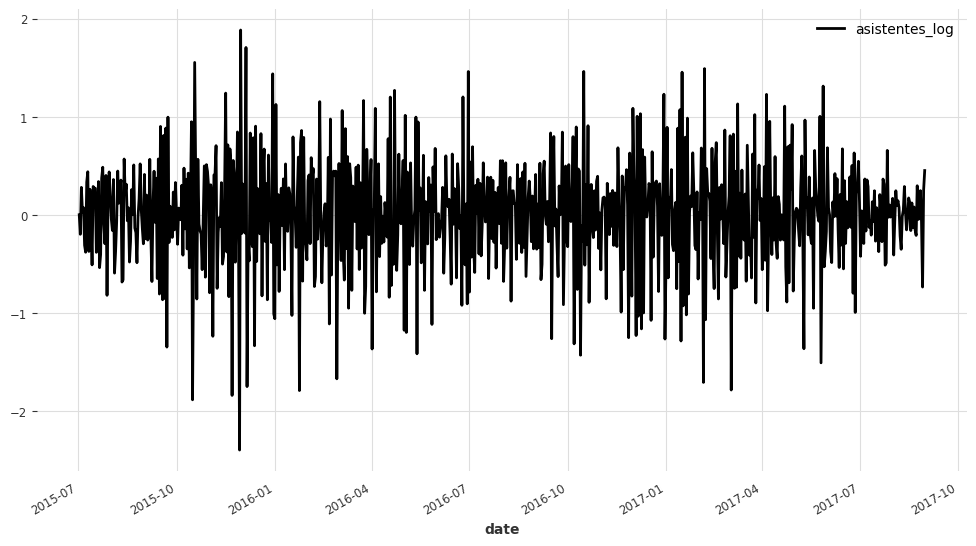

In [56]:
plt.figure(figsize=(12, 6))
asistentes_diff.plot()
plt.show()

In [57]:

asistentes_diff_pd = asistentes_diff.pd_series()

# Aplicar la prueba de Dickey-Fuller Aumentada
result = adfuller(asistentes_diff_pd.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.553695
p-value: 0.000000


# Tener en mente un d=1, ya está identificado

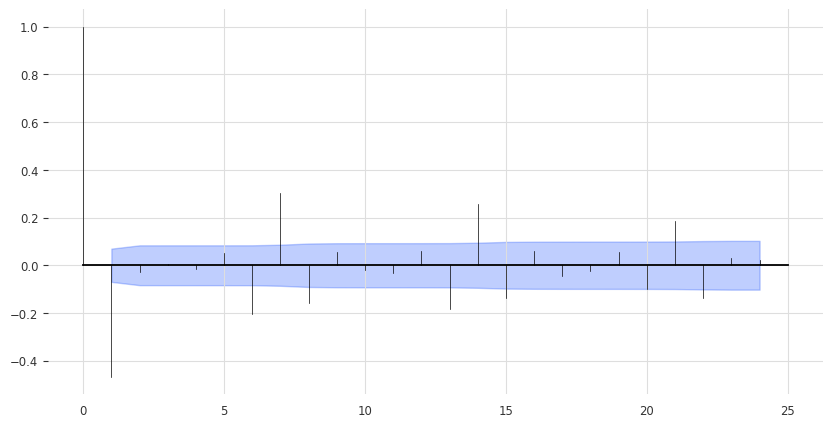

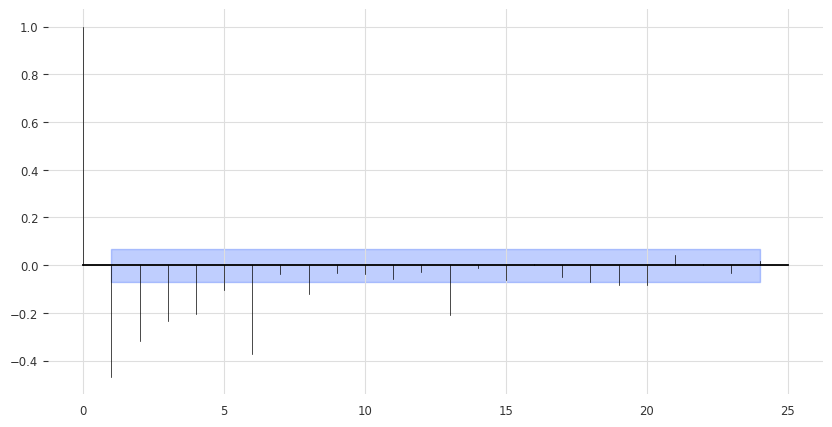

In [58]:
# Graficar ACF
plot_acf(asistentes_diff)

# Graficar PACF
plot_pacf(asistentes_diff)

# se propone un m=7, o s=7 dependiendo la notación

In [15]:
import statsmodels.api as sm

# Suponiendo que time_series_data es tu serie temporal
y = time_series_data['asistentes_log']
# Parámetros SARIMA
# Parámetros no estacionales (p, d, q)
p, d, q = 6, 1, 6 # Reemplaza con tus valores

# Parámetros estacionales (P, D, Q, m)
P, D, Q, m = 0, 0, 4, 7  # Reemplaza con tus valores (m es la periodicidad estacional)

# Ajuste del modelo SARIMA
modelo_sarima = sm.tsa.SARIMAX(y,
                               order=(p, d, q),
                               seasonal_order=(P, D, Q, m),
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                               trend = 'n')

# Ajuste del modelo
resultado_sarima = modelo_sarima.fit()

# Mostrar el resumen del modelo
print(resultado_sarima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                          SARIMAX Results                                           
Dep. Variable:                               asistentes_log   No. Observations:                  793
Model:             SARIMAX(6, 1, 6)x(0, 0, [1, 2, 3, 4], 7)   Log Likelihood                -377.532
Date:                                      Thu, 23 Nov 2023   AIC                            789.065
Time:                                              20:58:47   BIC                            867.764
Sample:                                                   0   HQIC                           819.376
                                                      - 793                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9813      0.664  